# Pandas - Anees Ahmad - Review - 2021/01/23


# Data Loading, Storage, and File Formats


* Topic Reading and Writing Data in Text Format  
Parsing functions in pandas  

* read_csv = load delimited data from a file, URL, or file-like   
object; use comma as default delimiter
* read_excel = Read tabular data from an Excel XLS or XLSX file
* read_html = Read all tables found in the given HTML document


# common options in these functions  


* Indexing  
Can treat one or more columns as the returned DataFrame, and whether to get
column names from the file, the user, or not at all.  
  
  
* Type inference and data conversion  
This includes the user-defined value conversions and custom list of missing value
markers.
  
  
* Datetime parsing  
Includes combining capability, including combining date and time information
spread over multiple columns into a single column in the result.  


* Iterating  
Support for iterating over chunks of very large files.  
  
  
* Unclean data issues  
Skipping rows or a footer, comments, or other minor things like numeric data with thousands separated by commas.


download examples folder from our provide link or book resources

# loading it into pandas data frame


In [1]:
import pandas as pd
sample_df= pd.read_csv("./files/sample.csv")
print(sample_df)
#What if no column names available
#(we are removing first row)

  studentid         name   chimestry   physics   english   math
0       A01     arif ali          20        30        40     50
1       A02  kamran khan          30        40        50     60
2       A03   imran ali           40        50        60     70
3       A04  kashif khan          50        60        70     80


In [2]:
sample_df= pd.read_csv("./files/sample.csv")
print(sample_df)
print("\n")

  studentid         name   chimestry   physics   english   math
0       A01     arif ali          20        30        40     50
1       A02  kamran khan          30        40        50     60
2       A03   imran ali           40        50        60     70
3       A04  kashif khan          50        60        70     80




In [3]:
# we can change the column names while loading data
sample_df=pd.read_csv("./files/sample.csv",skiprows=1,
                     names=['id', 'name', 'ch', 'ph', 'en', 'math'])
print(sample_df)

    id         name  ch  ph  en  math
0  A01     arif ali  20  30  40    50
1  A02  kamran khan  30  40  50    60
2  A03   imran ali   40  50  60    70
3  A04  kashif khan  50  60  70    80


In [4]:
# refer the book for other details like header=None  etc.

   a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo


<AxesSubplot:>

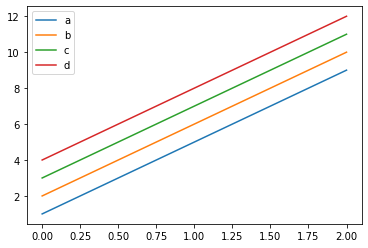

In [5]:
sample_df= pd.read_csv("./files/ex1.csv")
print(sample_df)
sample_df.plot()

# Hierarchal Index

In [6]:
s2_df = pd.read_csv("./files/sample2.csv")
print(s2_df)

  key1 key2  value1  value2
0  one    a       1       2
1  one    b       3       4
2  one    c       5       6
3  one    d       7       8
4  two    a       9      10
5  two    b      11      12
6  two    c      13      14
7  two    d      15      16


In [7]:
# we have to specifiy which column will be used as index
parsed = pd.read_csv("./files/sample2.csv")
parsed

,key1,key2,value1,value2
0,one,a,1,2
1,one,b,3,4
2,one,c,5,6
3,one,d,7,8
4,two,a,9,10
5,two,b,11,12
6,two,c,13,14
7,two,d,15,16


In [8]:
# use of other delimiter are also possible
#In some cases, a table might not have a fixed delimiter, using whitespace or some
#other pattern to separate fields
#checkout [21] and [24]

# Handling Missing Values

In [9]:
#something,a,b,c,d,message
#one,1,2,3,4,NA
#two,5,6,,8,world
#three,9,10,11,12,foo
result = pd.read_csv('./files/sample3.csv')
print(result)


  something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       two  5   6   NaN   8   world
2     three  9  10  11.0  12     foo


In [10]:
result = pd.read_csv('./files/sample3.csv', na_values=['NULL'])
print(result)

  something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       two  5   6   NaN   8   world
2     three  9  10  11.0  12     foo


In [11]:
# changing data while loading in dataframe
#diconary=  column name : [source values, target value]#
sentinels = {'message': ['foo', 'NA']}
pd.read_csv('./files/sample3.csv', na_values=sentinels)

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


Handling missing values is an important and frequently nuanced part of the file parsing process. Missing data is usually either not present (empty string) or marked by
some sentinel value. By default, pandas uses a set of commonly occurring sentinels,
such as NA and NULL

# Reading and  Text Files in Pieces

In [12]:
# #Creating A sample csv/Excel file
# https://www.kaggle.com/iabhishekofficial/mobile-price-classification
# #train.csv

In [13]:
#extracting selected rows from a large datasets
pd.read_csv('./files/train.csv',nrows=200)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1526,0,2.1,0,1,1,23,0.2,117,7,...,718,751,2227,18,10,3,1,1,0,2
196,1989,0,2.5,1,0,1,41,0.8,94,3,...,1100,1497,1665,17,9,12,1,1,1,2
197,1308,0,1.9,0,0,1,61,0.7,106,3,...,59,1215,3355,15,2,4,1,0,1,3
198,609,0,0.5,0,3,0,26,0.3,93,4,...,938,1948,1866,11,10,14,1,1,1,1


In [14]:
#To read a file in pieces, specify a chunksize as a number of rows:
chunks = pd.read_csv('./files/train.csv', chunksize=200)
chunks

In [15]:
print(type(chunks), print(chunks) )

<class 'pandas.io.parsers.readers.TextFileReader'> None


In [16]:
chunkList = []
for chunk in chunks:
	# each chunk will work as dataframe)
	#print(type(chunk), len(chunk))
    #print(chunk.head())
    chunkList.append(chunk)
chunkList

[     battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
 0              842     0          2.2         0   1       0           7   
 1             1021     1          0.5         1   0       1          53   
 2              563     1          0.5         1   2       1          41   
 3              615     1          2.5         0   0       0          10   
 4             1821     1          1.2         0  13       1          44   
 ..             ...   ...          ...       ...  ..     ...         ...   
 195           1526     0          2.1         0   1       1          23   
 196           1989     0          2.5         1   0       1          41   
 197           1308     0          1.9         0   0       1          61   
 198            609     0          0.5         0   3       0          26   
 199           1905     0          0.6         1   9       1          36   
 
      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
 0     

In [17]:
df = chunkList[2] 
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
400,1266,0,1.9,1,0,1,7,0.2,184,3,...,346,1468,2532,10,5,4,1,1,1,2
401,1042,0,2.7,1,16,1,50,0.8,93,7,...,727,1705,3215,18,0,20,1,1,1,3
402,1479,0,0.5,0,8,0,19,0.6,156,3,...,180,1476,3323,13,12,6,1,0,1,3
403,1476,1,1.2,1,0,1,55,0.1,171,4,...,1641,1666,1529,13,8,3,1,0,1,2
404,1552,1,2.2,0,6,1,13,0.2,123,6,...,269,1026,2403,9,2,9,1,1,1,2


In [18]:
data = list(open('./files/ex3.txt'))
print(data)

['            A         B         C\n', 'aaa -0.264438 -1.026059 -0.619500\n', 'bbb  0.927272  0.302904 -0.032399\n', 'ccc -0.264273 -0.386314 -0.217601\n', 'ddd -0.871858 -0.348382  1.100491\n']


In [19]:
# use spaces (one or more ) as delimiter 
result = pd.read_table('./files/ex3.txt', sep='\s+')
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [20]:
df = pd.read_csv('./files/ex4.csv', skiprows=[0, 2, 3])
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [21]:
#Table 6-2. Some read_csv/read_table function arguments


# Writing Data to Text Format

In [22]:
data = pd.read_csv('./files/ex5.csv')
print(data)
data.to_csv('./files/out.csv')

  something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       two  5   6   NaN   8   world
2     three  9  10  11.0  12     foo


In [23]:
import numpy as np
dates = pd.date_range('1/1/2000', periods=7)
print(dates)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07'],
              dtype='datetime64[ns]', freq='D')


In [24]:
ts = pd.Series(np.arange(7), index=dates)
ts

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
2000-01-06    5
2000-01-07    6
Freq: D, dtype: int32

In [25]:
ts.to_csv("./files/tseries.csv")

# JSON Data
short for JavaScript Object Notation

In [26]:
obj = """
{"name": "Wes",
"places_lived": ["United States", "Spain", "Germany"],
"pet": null,
"siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
{"name": "Katie", "age": 38,
"pets": ["Sixes", "Stache", "Cisco"]}]
}
"""
print(obj)


{"name": "Wes",
"places_lived": ["United States", "Spain", "Germany"],
"pet": null,
"siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
{"name": "Katie", "age": 38,
"pets": ["Sixes", "Stache", "Cisco"]}]
}



In [27]:
# same like dictionary
data = pd.read_json('./files/example.json')
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


# XML and HTML: Web   data loading in to dataframe

In [28]:
#conda install lxml
# conda install -c anaconda beautifulsoup4 
# htconda install -c anaconda html5lib
import pandas as pd
tables = pd.read_html('./files/fdic_failed_bank_list.html')
tables


[                             Bank Name             City  ST   CERT  \
 0                          Allied Bank         Mulberry  AR     91   
 1         The Woodbury Banking Company         Woodbury  GA  11297   
 2               First CornerStone Bank  King of Prussia  PA  35312   
 3                   Trust Company Bank          Memphis  TN   9956   
 4           North Milwaukee State Bank        Milwaukee  WI  20364   
 ..                                 ...              ...  ..    ...   
 542                 Superior Bank, FSB         Hinsdale  IL  32646   
 543                Malta National Bank            Malta  OH   6629   
 544    First Alliance Bank & Trust Co.       Manchester  NH  34264   
 545  National State Bank of Metropolis       Metropolis  IL   3815   
 546                   Bank of Honolulu         Honolulu  HI  21029   
 
                    Acquiring Institution        Closing Date  \
 0                           Today's Bank  September 23, 2016   
 1              

In [29]:
# tables variable type is not dataframe, its list
print(type(tables))
print(len(tables))
failures_df = tables[0]
print(type(failures_df))
print(failures_df.shape)

<class 'list'>
1
<class 'pandas.core.frame.DataFrame'>
(547, 7)


In [30]:
# warning: data is bit lengthy in this data frame
print(failures_df.columns)
len(failures_df)
print(failures_df["City"].head())
print(failures_df["Bank Name"].head())
print(failures_df.head())

Index(['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution',
       'Closing Date', 'Updated Date'],
      dtype='object')
0           Mulberry
1           Woodbury
2    King of Prussia
3            Memphis
4          Milwaukee
Name: City, dtype: object
0                     Allied Bank
1    The Woodbury Banking Company
2          First CornerStone Bank
3              Trust Company Bank
4      North Milwaukee State Bank
Name: Bank Name, dtype: object
                      Bank Name             City  ST   CERT  \
0                   Allied Bank         Mulberry  AR     91   
1  The Woodbury Banking Company         Woodbury  GA  11297   
2        First CornerStone Bank  King of Prussia  PA  35312   
3            Trust Company Bank          Memphis  TN   9956   
4    North Milwaukee State Bank        Milwaukee  WI  20364   

                 Acquiring Institution        Closing Date       Updated Date  
0                         Today's Bank  September 23, 2016  November 17, 2016  


In [31]:
# for large and complicated dataframe, try to extract
# data as series for review and analysis
# here we converted a column into a new series of date type
close_timestamps = pd.to_datetime(failures_df['Closing Date'])
print(type(close_timestamps),close_timestamps)

<class 'pandas.core.series.Series'> 0     2016-09-23
1     2016-08-19
2     2016-05-06
3     2016-04-29
4     2016-03-11
         ...    
542   2001-07-27
543   2001-05-03
544   2001-02-02
545   2000-12-14
546   2000-10-13
Name: Closing Date, Length: 547, dtype: datetime64[ns]


In [32]:
# Binary Data Formats

In [33]:
frame = pd.read_csv('./files/ex1.csv')
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [34]:
frame.to_pickle('./files/frame_pickle')
pd.read_pickle('./files/frame_pickle')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [35]:
# Using HDF5 Format
import numpy as np
import pandas as pd
frame = pd.DataFrame({'a': np.random.randn(100)})
frame

,a
0,-0.083093
1,0.486579
2,-0.776874
3,-1.098630
4,0.357784
...,...
95,0.127932
96,-0.019671
97,2.095177
98,1.098930


In [36]:
store = pd.HDFStore('./files/mydata.h5')
store['obj1'] = frame
store['obj1_col'] = frame['a']
print(store)

<class 'pandas.io.pytables.HDFStore'>
File path: ./files/mydata.h5



In [37]:
x=store.obj1
print(type(x))
print(x.head())

<class 'pandas.core.frame.DataFrame'>
          a
0 -0.083093
1  0.486579
2 -0.776874
3 -1.098630
4  0.357784


In [38]:
print('--------------')
store.put('obj2', frame, format='table')
store.select('obj2', where=['index >= 10 and index <= 15'])
store.close()

--------------


In [39]:

frame.to_hdf('./files/mydata.h5', 'obj3', format='table')
frame = pd.read_hdf('./files/mydata.h5', 'obj3', where=['index < 5'])

In [40]:
frame

,a
0,-0.083093
1,0.486579
2,-0.776874
3,-1.098630
4,0.357784


In [41]:
# Reading Microsoft Excel Files

In [42]:
#reading
import pandas as pd

xlsx = pd.ExcelFile('./files/ex1.xlsx')
pd.read_excel(xlsx, 'Sheet1')

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [43]:
frame = pd.read_excel('./files/ex1.xlsx', 'Sheet1')
frame

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [44]:
# writing
writer = pd.ExcelWriter('./files/ex2.xlsx')
frame.to_excel(writer, 'Sheet1')
writer.save()
# alternative option for single sheet
frame.to_excel('./files/ex2.xlsx')
frame

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [45]:
# Interacting with Web APIs


In [46]:
import requests
import numpy as np
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
resp = requests.get(url)
print(resp)

<Response [200]>


In [47]:
data = resp.json()
print(type(data))
print(data)

<class 'list'>
[{'url': 'https://api.github.com/repos/pandas-dev/pandas/issues/46890', 'repository_url': 'https://api.github.com/repos/pandas-dev/pandas', 'labels_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/46890/labels{/name}', 'comments_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/46890/comments', 'events_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/46890/events', 'html_url': 'https://github.com/pandas-dev/pandas/issues/46890', 'id': 1218658465, 'node_id': 'I_kwDOAA0YD85Io0Ch', 'number': 46890, 'title': 'BUG: Error reading parquet', 'user': {'login': 'eddaz7', 'id': 59227306, 'node_id': 'MDQ6VXNlcjU5MjI3MzA2', 'avatar_url': 'https://avatars.githubusercontent.com/u/59227306?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/eddaz7', 'html_url': 'https://github.com/eddaz7', 'followers_url': 'https://api.github.com/users/eddaz7/followers', 'following_url': 'https://api.github.com/users/eddaz7/following{/other_user}', 'gists_url

In [48]:
data_dict = data[0]
print(data_dict['title'])
print(data_dict.keys())

BUG: Error reading parquet
dict_keys(['url', 'repository_url', 'labels_url', 'comments_url', 'events_url', 'html_url', 'id', 'node_id', 'number', 'title', 'user', 'labels', 'state', 'locked', 'assignee', 'assignees', 'milestone', 'comments', 'created_at', 'updated_at', 'closed_at', 'author_association', 'active_lock_reason', 'body', 'reactions', 'timeline_url', 'performed_via_github_app'])


In [49]:
issues = pd.DataFrame(data, 
                    columns=['number', 'title','labels', 'state'])

issues = pd.DataFrame(data)
issues.head()

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,updated_at,closed_at,author_association,active_lock_reason,body,reactions,timeline_url,performed_via_github_app,draft,pull_request
0,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/46890,1218658465,I_kwDOAA0YD85Io0Ch,46890,BUG: Error reading parquet,...,2022-04-28T12:32:06Z,None,NONE,None,### Pandas version checks\r\n\r\n- [X] I have ...,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,NaN,NaN
1,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/46889,1218542894,I_kwDOAA0YD85IoX0u,46889,DOC: Wrong Series.rename parameter documentation,...,2022-04-28T10:44:51Z,None,CONTRIBUTOR,None,### Pandas version checks\n\n- [X] I have chec...,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,NaN,NaN
2,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/46888,1218426806,I_kwDOAA0YD85In7e2,46888,Git.io deprecation notice,...,2022-04-28T09:05:11Z,None,NONE,None,"\nHello, I've found that some of your files in...",{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,NaN,NaN
3,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/46886,1217903962,PR_kwDOAA0YD84250bm,46886,REF: handle 2D in tslibs.vectorized,...,2022-04-28T12:27:37Z,None,MEMBER,None,- [ ] closes #xxxx (Replace xxxx with the Gith...,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,False,{'url': 'https://api.github.com/repos/pandas-d...
4,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/46885,1217864758,I_kwDOAA0YD85IlyQ2,46885,BUG: complex type columns converted to string ...,...,2022-04-27T20:45:57Z,None,NONE,None,### Pandas version checks\n\n- [X] I have chec...,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,NaN,NaN


In [50]:
print(issues[['number', 'title']].head())

   number                                              title
0   46890                         BUG: Error reading parquet
1   46889   DOC: Wrong Series.rename parameter documentation
2   46888                          Git.io deprecation notice
3   46886                REF: handle 2D in tslibs.vectorized
4   46885  BUG: complex type columns converted to string ...


In [51]:
#Interacting with Databases
import sqlite3
#creating table
query = """ CREATE TABLE test(a VARCHAR(20), 
        b VARCHAR(20),c REAL,
        d INTEGER);  """
# creating database file
con = sqlite3.connect('./files/mydata.sqlite')
#running query
con.execute(query)
# table created
con.commit()
# done


In [52]:
# inserting data
#preparing data
data = [('Atlanta', 'Georgia', 1.25, 6),
        ('Tallahassee', 'Florida', 2.6, 3),
        ('Sacramento', 'California', 1.7, 5)
       ]
# preparing insert statement
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"
# running insert statement
con.executemany(stmt, data)
#finalizing data saving
con.commit()

In [53]:
#selecting/extracting data
cursor = con.execute('select * from test')
rows = cursor.fetchall()
print(type(rows), rows)


<class 'list'> [('Atlanta', 'Georgia', 1.25, 6), ('Tallahassee', 'Florida', 2.6, 3), ('Sacramento', 'California', 1.7, 5)]


In [54]:
print(cursor.description)

(('a', None, None, None, None, None, None), ('b', None, None, None, None, None, None), ('c', None, None, None, None, None, None), ('d', None, None, None, None, None, None))


In [55]:
data_df = pd.DataFrame(rows, columns=[x[0] for x in cursor.description])
data_df

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5
